In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

In [2]:
df = pd.read_csv('../../../../Data/placement_package.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0], df.iloc[:, 1], test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160,), (40,), (160,), (40,))

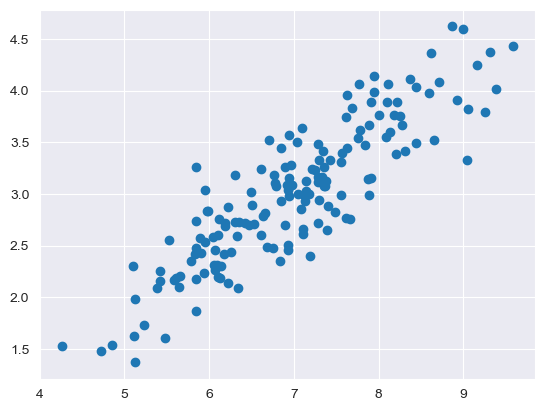

In [4]:
plt.scatter(X_train, y_train)

In [10]:
class RidgeRegression:
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        no_of_row = X_train.shape[0]
        
        num = 0
        deno = 0
        
        x_mean = X_train.mean()
        y_mean = y_train.mean()
        
        for ithRow in range(no_of_row):
            num += (X_train.iloc[ithRow] - x_mean) * (y_train.iloc[ithRow] - y_mean)
            deno += (X_train.iloc[ithRow] - x_mean)**2
            
        self.m = num/(deno + self.alpha)
        self.b = y_mean - (self.m * x_mean)
        
    def predict(self,X_test):
        return (self.m * X_test) + self.b
        

In [11]:
ridgeReg = RidgeRegression(alpha=0.001)

In [12]:
ridgeReg.fit(X_train, y_train)

In [13]:
y_pred = ridgeReg.predict(X_test)
y_pred

112    3.891111
29     3.093244
182    2.384649
199    2.574352
193    1.653736
85     1.776485
10     2.072198
54     2.931439
115    3.762783
35     2.937019
12     4.091973
92     3.511706
13     2.970495
126    2.401388
174    3.188096
2      3.467070
44     1.943869
3      3.243890
113    2.976075
14     3.416855
23     2.557613
25     3.165778
6      2.858906
134    3.121142
165    3.684670
173    2.870065
45     3.494967
65     3.344321
48     3.919009
122    1.960608
178    3.651193
64     3.210413
9      3.740465
57     2.786372
78     2.780793
71     3.271788
128    3.528444
176    2.613408
131    2.658044
53     2.713839
Name: cgpa, dtype: float64

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7807294112384224